In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
# python 모듈을 불러오기 위해 sys path list에 경로 추가
sys.path.append('/content/drive/MyDrive/pytorch_snippet')

import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from functions import *
import models
import copy

!pip install torchinfo
from torchinfo import summary

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cuda


In [2]:
#### arg로 수정하기 ####

BATCH_SIZE = 64
LR = 2e-3
LR_STEP = 3
LR_GAMMA = 0.9
EPOCH = 5
TRAIN_RATIO = 0.8
criterion = nn.CrossEntropyLoss()
new_model_train = True
model_type = "VGG11_cifar10"
dataset = "CIFAR10"
save_model_path = f'/content/drive/MyDrive/pytorch_snippet/results/{model_type}_{dataset}.pt'
save_history_path = f"/content/drive/MyDrive/pytorch_snippet/results/{model_type}_history_{dataset}.pt"
load_model_path = None

In [3]:
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])
transform_test = transforms.ToTensor()

In [4]:
train_DS = datasets.CIFAR10(root = '/content/drive/MyDrive/pytorch_snippet/data', train=True, download=True, transform=transform_train)
NoT = int(len(train_DS)*TRAIN_RATIO)
NoV = len(train_DS) - NoT
train_DS, val_DS = torch.utils.data.random_split(train_DS, [NoT, NoV])
val_DS.transform = transform_test
test_DS = datasets.CIFAR10(root = '/content/drive/MyDrive/pytorch_snippet/data', train=False, download=True, transform=transform_test)

train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
val_DL = torch.utils.data.DataLoader(val_DS, batch_size=BATCH_SIZE, shuffle=False)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# exec() # 문자열을 코드로 바꿔준다.
exec(f"model = models.{model_type}().to(DEVICE)")

x_batch, _ = next(iter(train_DL))
summary(model, input_size=(x_batch.shape), device=DEVICE)

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [64, 10]                  --
├─Sequential: 1-1                        [64, 512, 1, 1]           --
│    └─Conv2d: 2-1                       [64, 64, 32, 32]          1,728
│    └─BatchNorm2d: 2-2                  [64, 64, 32, 32]          128
│    └─ReLU: 2-3                         [64, 64, 32, 32]          --
│    └─MaxPool2d: 2-4                    [64, 64, 16, 16]          --
│    └─Conv2d: 2-5                       [64, 128, 16, 16]         73,728
│    └─BatchNorm2d: 2-6                  [64, 128, 16, 16]         256
│    └─ReLU: 2-7                         [64, 128, 16, 16]         --
│    └─MaxPool2d: 2-8                    [64, 128, 8, 8]           --
│    └─Conv2d: 2-9                       [64, 256, 8, 8]           294,912
│    └─BatchNorm2d: 2-10                 [64, 256, 8, 8]           512
│    └─ReLU: 2-11                        [64, 256, 8, 8]           --


Epoch: 1, current_LR = 0.002


100%|██████████| 157/157 [00:04<00:00, 33.77it/s]


train loss: 2.30298, val loss: 2.30262 
train acc: 10.0 %, val acc: 10.0 %, time: 68 s
--------------------
Epoch: 2, current_LR = 0.002


100%|██████████| 157/157 [00:04<00:00, 33.50it/s]


train loss: 2.30288, val loss: 2.30275 
train acc: 10.0 %, val acc: 10.0 %, time: 65 s
--------------------
Epoch: 3, current_LR = 0.002


100%|██████████| 157/157 [00:05<00:00, 28.82it/s]


train loss: 2.3029, val loss: 2.3026 
train acc: 9.6 %, val acc: 10.0 %, time: 72 s
--------------------
Epoch: 4, current_LR = 0.0018000000000000002


100%|██████████| 157/157 [00:05<00:00, 27.98it/s]


train loss: 2.30283, val loss: 2.30268 
train acc: 9.9 %, val acc: 10.0 %, time: 64 s
--------------------
Epoch: 5, current_LR = 0.0018000000000000002


100%|██████████| 157/157 [00:04<00:00, 35.66it/s]


train loss: 2.30284, val loss: 2.3026 
train acc: 9.9 %, val acc: 10.0 %, time: 75 s
--------------------
Epoch: 6, current_LR = 0.0018000000000000002


100%|██████████| 157/157 [00:09<00:00, 17.35it/s]


train loss: 2.30284, val loss: 2.30275 
train acc: 9.7 %, val acc: 10.0 %, time: 65 s
--------------------
Epoch: 7, current_LR = 0.0016200000000000001


100%|██████████| 157/157 [00:07<00:00, 21.36it/s]


train loss: 2.30282, val loss: 2.30263 
train acc: 9.9 %, val acc: 10.1 %, time: 65 s
--------------------
Epoch: 8, current_LR = 0.0016200000000000001


100%|██████████| 157/157 [00:04<00:00, 35.25it/s]


train loss: 2.30282, val loss: 2.30269 
train acc: 9.7 %, val acc: 10.0 %, time: 59 s
--------------------
Epoch: 9, current_LR = 0.0016200000000000001


100%|██████████| 157/157 [00:05<00:00, 28.04it/s]


train loss: 2.30282, val loss: 2.30266 
train acc: 9.9 %, val acc: 10.0 %, time: 59 s
--------------------
Epoch: 10, current_LR = 0.001458


100%|██████████| 157/157 [00:04<00:00, 35.55it/s]


train loss: 2.30277, val loss: 2.3027 
train acc: 9.8 %, val acc: 9.6 %, time: 59 s
--------------------


TypeError: ignored

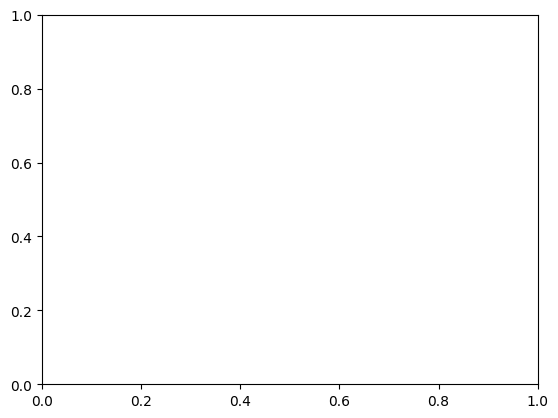

In [17]:
if new_model_train:
    optimizer = optim.Adam(model.parameters(), lr=LR)
    loss_history, acc_history = Train(model, train_DL, val_DL, criterion, optimizer,
                         EPOCH, BATCH_SIZE, TRAIN_RATIO,
                         save_model_path, save_history_path,
                         LR_STEP=LR_STEP, LR_GAMMA=LR_GAMMA)

NameError: ignored

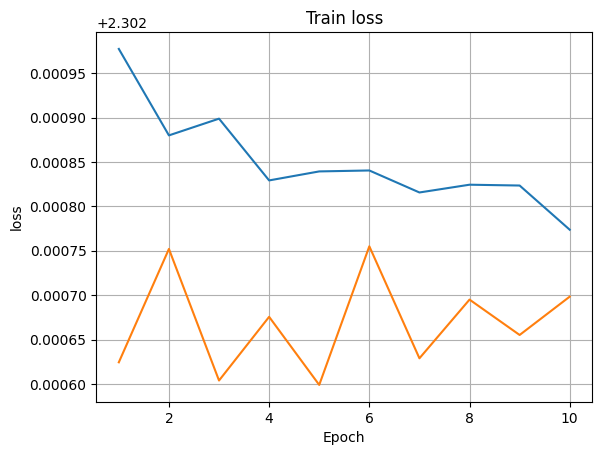

In [20]:
if new_model_train:
    plt.plot(range(1, EPOCH+1), loss_history['train'])
    plt.plot(range(1, EPOCH+1), loss_history['val'])
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.title("Train Val loss")
    plt.grid()

    plt.plot(range(1, EPOCH+1), acc_history['train'])
    plt.plot(range(1, EPOCH+1), acc_history['val'])
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.title("Train Val acc")
    plt.grid()

In [ ]:
if load_model_path:
    load_model = torch.load(load_model_path, map_location=DEVICE)
else:
    load_model = model

In [ ]:
Test(load_model, test_DL)
print(count_params(load_model))

In [ ]:
Test_plot(load_model, test_DL)